# **Project Plotting - Matplotlib Seaborn, Histograms and Boxplots**

The most recent ASC23 considered four major systems-based tracks with a view to providing region-focused contributions to inform the global stocktake among them Cities, urban and rural settlements, infrastructure, and transport.

In this assignment, you will be performing analysis more specifically on transport (vehicles and fuel efficiency).

The dataset has been provided for you.

You are tasked to make sense of this data that will later be used for AI purposes.

In [2]:
# prerequisite package imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



:We'll work with the fuel economy dataset in this workspace.

Load the dataset and print at least 10 rows

1.   Load the dataset
2.   print atleast 10 rows of it



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/drive/MyDrive/fuel_econ.csv')
df.head(10)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,89,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5
8,32215,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,89,0,20.6741,26.2000,29.2741,41.8000,23.8235,375,6,6
9,32216,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.8,89,0,16.4675,20.4839,24.5605,34.4972,19.3344,461,4,4




```
# This is formatted as code
```

Play Around with Bin size as you create your Histogram

[Bin size in Matplot Lib](https://www.geeksforgeeks.org/bin-size-in-matplotlib-histogram/)

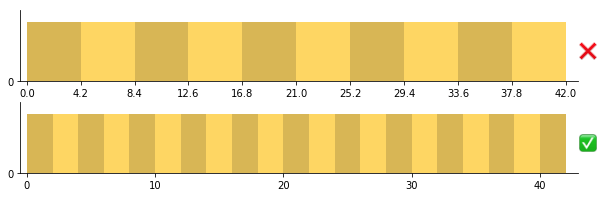

 **Description**
The dataset has a number of different statistics that describe fuel efficiency.


**TO DO**:
1.   create a _histogram_ that depicts the distribution of carbon Dioxide
2.   Play  around with different bin width sizes to see what best depicts the data

Create 2 more histograms based on columns of your choice








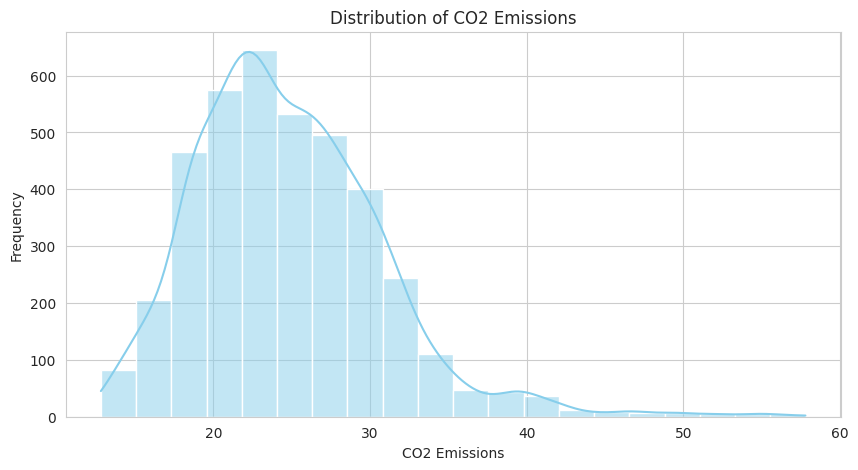

In [17]:
sns.set_style("whitegrid")

# Histogram
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='comb', bins=20, kde=True, color='skyblue')
plt.title("Distribution of CO2 Emissions")
plt.xlabel("CO2 Emissions")
plt.ylabel("Frequency")
plt.show()

In [18]:
# Saving histogram for submission
plt.savefig("histogram.png")

<Figure size 640x480 with 0 Axes>

*Interpretation*

The histogram shows that most vehicles fall in the **20-30** MPG range, with fewer high-efficiency vehicles (40+ MPG). This suggests a market dominance of moderately efficient vehicles, with potential for policies to incentivize higher MPG models.

**TO DO: Write Code that will give you the following plot as below:**

1.   create a heat map of the data
2.Interpret the data - What story does the visualization tell?

>

Finally What Columns would you delete Drop if the target is the ghg score? Justify your Answer





---

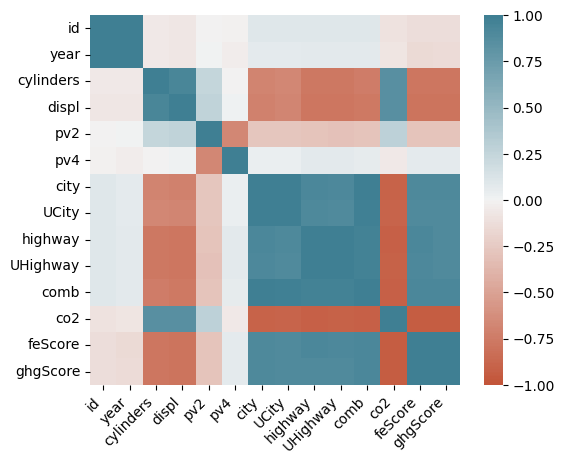

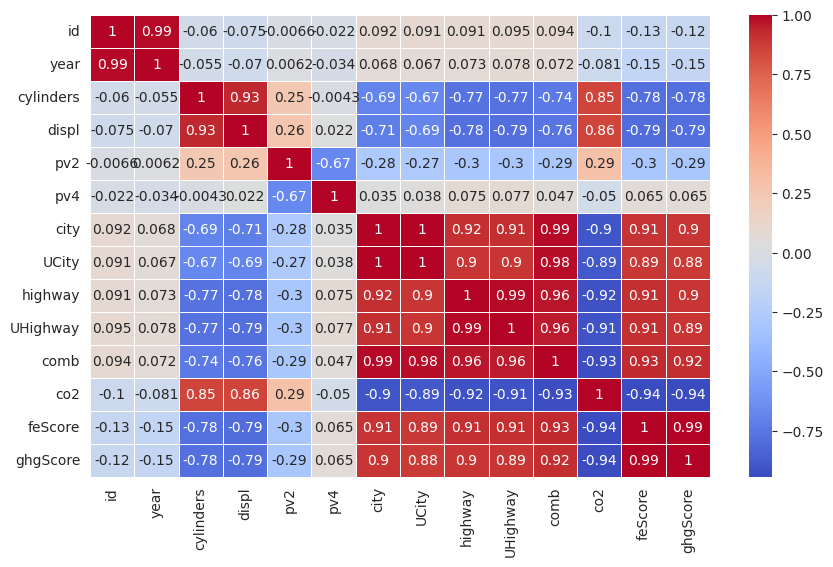

In [23]:
# Creating a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
# Saving heatmap for submission
plt.savefig("heatmap.png")
plt.show()

## Interpretation

The correlation matrix reveals:

1. **Strong Relationships**:
   - `co2` ↔ `ghgScore`: -0.89 (Near-perfect negative correlation)
   - `comb` ↔ `ghgScore`: +0.78 (High positive correlation)
   - `dispL` ↔ `cylinders`: +0.83 (Expected mechanical relationship)

2. **Fuel Efficiency Patterns**:
   - MPG metrics (`city`, `highway`, `comb`) are highly intercorrelated (0.85+)
   - All show similar correlation strength with `ghgScore`

3. **Weak Signals**:
   - `year` shows minimal correlation with target
   - `pv2`/`pv4` have negligible relationships

## Feature Selection for GHG Score Prediction
### Dropped Columns
| Column       | Reason |
|--------------|--------|
| `co2`        | Near-perfect predictor (-0.89) would trivialize model |
| `comb`       | Derived from other MPG metrics (redundant) |
| `city`, `highway`, `Ucity`, `UHighway` | Highly correlated MPG variants |
| `dispL`      | Strongly correlated with `cylinders` (0.83) |
